In [2]:
import pandas as pd
import numpy as np

In [3]:
%ls

 Volume in drive C is Windows
 Volume Serial Number is A254-0978

 Directory of C:\Users\zeyad\Documents\GitHub\mylabs

2021-10-21  05:34 PM    <DIR>          .
2021-10-21  05:34 PM    <DIR>          ..
2021-10-18  02:26 PM             1,928 .gitignore
2021-10-21  05:34 PM    <DIR>          .ipynb_checkpoints
2021-10-21  03:03 PM           874,852 Correlation_Distribution_Multicollinearity.ipynb
2021-10-20  05:47 PM             4,055 Customer Analysis Lab1.py
2021-10-21  05:24 PM           841,526 Customer Analysis Round 3.ipynb
2021-10-21  05:34 PM           841,526 Customer Analysis Round 3-Copy1.ipynb
2021-10-21  03:54 PM            99,386 Customer Analysis Round2.ipynb
2021-10-18  02:26 PM            87,809 file4.xlsx
2021-10-20  03:03 PM         1,373,574 marketing_customer_analysis.xlsx
2015-11-04  05:39 AM            10,991 opertionssasasa.xlsx
2021-10-21  11:26 AM            50,914 penguins_lter.csv
2021-10-21  11:26 AM            13,519 penguins_size.csv
2021-10-18  02:26 PM  

In [4]:
df=pd.read_excel('marketing_customer_analysis.xlsx')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Unnamed: 0                     10910 non-null  int64         
 1   Customer                       10910 non-null  object        
 2   State                          10279 non-null  object        
 3   Customer Lifetime Value        10910 non-null  float64       
 4   Response                       10279 non-null  object        
 5   Coverage                       10910 non-null  object        
 6   Education                      10910 non-null  object        
 7   Effective To Date              10910 non-null  datetime64[ns]
 8   EmploymentStatus               10910 non-null  object        
 9   Gender                         10910 non-null  object        
 10  Income                         10910 non-null  int64         
 11  Location Code  

In [6]:
df.shape

(10910, 26)

In [7]:
df.head()

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [8]:
df=df.rename(columns={'EmploymentStatus':'Employment Status'})

In [9]:
def standardize_col(df):
    return df.lower().replace(" ","_")

In [10]:
standardize_col("Employment Status")

'employment_status'

In [11]:
new_df =[]

for col in df.columns.to_list():
    new_df.append(standardize_col(col))

In [12]:
df.columns=new_df

In [13]:
new_df

['unnamed:_0',
 'customer',
 'state',
 'customer_lifetime_value',
 'response',
 'coverage',
 'education',
 'effective_to_date',
 'employment_status',
 'gender',
 'income',
 'location_code',
 'marital_status',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'total_claim_amount',
 'vehicle_class',
 'vehicle_size',
 'vehicle_type']

In [14]:
df.head()

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   unnamed:_0                     10910 non-null  int64         
 1   customer                       10910 non-null  object        
 2   state                          10279 non-null  object        
 3   customer_lifetime_value        10910 non-null  float64       
 4   response                       10279 non-null  object        
 5   coverage                       10910 non-null  object        
 6   education                      10910 non-null  object        
 7   effective_to_date              10910 non-null  datetime64[ns]
 8   employment_status              10910 non-null  object        
 9   gender                         10910 non-null  object        
 10  income                         10910 non-null  int64         
 11  location_code  

In [16]:
df_numerical=df.select_dtypes(np.number)

df_numerical.head()

,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,4,9025.067525,23675,117,NaN,31,NaN,7,707.925645


In [17]:
df_categorical=df.select_dtypes(include='object')

df_categorical.head()


,customer,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN


In [18]:
nullsdf=df.isna().all(axis=1)

In [19]:
nullsdf=pd.DataFrame(round(df.isna().sum()/len(df),4)*100)

In [20]:
nullsdf=nullsdf.rename(columns={'index':'headers',0:'proportionat_nulls'})

In [21]:
nullsdf

,proportionat_nulls
unnamed:_0,0.00
customer,0.00
state,5.78
customer_lifetime_value,0.00
response,5.78
coverage,0.00
education,0.00
effective_to_date,0.00
employment_status,0.00
gender,0.00


In [22]:
nulltest=df[df['number_of_open_complaints'].isna()==True]

In [23]:
newdf=df.fillna('Unknown')

In [24]:
newdf

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,Unknown
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,Unknown
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,Unknown,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,...,Unknown,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,Unknown
10908,10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [25]:
import time 
from datetime import date 
import datetime

In [26]:
date.today()

datetime.date(2021, 10, 21)

In [27]:
newdf['effective_to_date']=pd.to_datetime(newdf['effective_to_date'],errors='coerce')

In [28]:
newdf['effective_to_date']

0       2011-02-18
1       2011-01-18
2       2011-02-10
3       2011-01-11
4       2011-01-17
           ...    
10905   2011-01-19
10906   2011-01-06
10907   2011-02-06
10908   2011-02-13
10909   2011-01-08
Name: effective_to_date, Length: 10910, dtype: datetime64[ns]

In [29]:
newdf['effective_to_date'][1000]

Timestamp('2011-01-27 00:00:00')

In [30]:
newdf['effective_to_date'][1000].month

1

In [31]:
newdf['month'] = pd.DatetimeIndex(newdf['effective_to_date']).month

In [32]:
newdf.head()

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,Unknown,2
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,Unknown,1
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,Unknown,1


In [33]:
newdf['month'] = pd.DatetimeIndex(newdf['effective_to_date']).month_name

In [34]:
newdf['month'] =newdf['effective_to_date'].dt.strftime('%B')

In [35]:
newdf.head()

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,Unknown,February
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,Unknown,January
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,February
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,January
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,Unknown,January


In [36]:
newdf['month'] = newdf['month'].astype(str)



In [37]:
newdf.query('month =="January" or month=="February" or month =="March"')

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,Unknown,February
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,Unknown,January
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,February
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,January
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,Unknown,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,January
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,January
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,Unknown,February
10908,10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,February


In [38]:
newdf['month'].value_counts()

January     5818
February    5092
Name: month, dtype: int64

In [39]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   unnamed:_0                     10910 non-null  int64         
 1   customer                       10910 non-null  object        
 2   state                          10910 non-null  object        
 3   customer_lifetime_value        10910 non-null  float64       
 4   response                       10910 non-null  object        
 5   coverage                       10910 non-null  object        
 6   education                      10910 non-null  object        
 7   effective_to_date              10910 non-null  datetime64[ns]
 8   employment_status              10910 non-null  object        
 9   gender                         10910 non-null  object        
 10  income                         10910 non-null  int64         
 11  location_code  

In [40]:
newdf.describe()

,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,number_of_policies,total_claim_amount
count,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000
mean,5454.500000,8018.241094,37536.284785,93.196059,48.091934,2.979193,434.888330
std,3149.590053,6885.081434,30359.195670,34.442532,27.940675,2.399359,292.180556
min,0.000000,1898.007675,0.000000,61.000000,0.000000,1.000000,0.099007
25%,2727.250000,4014.453113,0.000000,68.000000,24.000000,1.000000,271.082527
50%,5454.500000,5771.147235,33813.500000,83.000000,48.000000,2.000000,382.564630
75%,8181.750000,8992.779137,62250.750000,109.000000,71.000000,4.000000,547.200000
max,10909.000000,83325.381190,99981.000000,298.000000,99.000000,9.000000,2893.239678


In [41]:
import seaborn as sns
import matplotlib.pyplot as plt 


<AxesSubplot:>

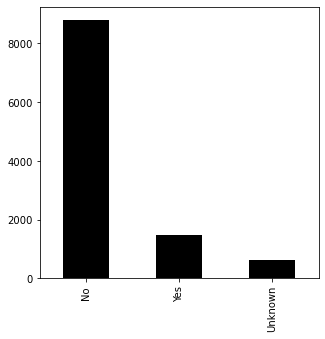

In [42]:
plt.figure(figsize= (5,5))


newdf['response'].value_counts().plot(kind='bar',color='black')

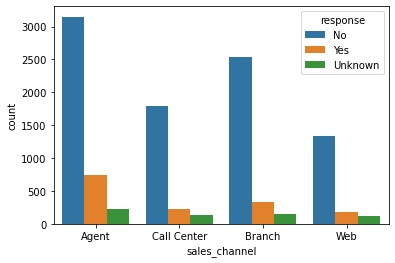

In [43]:
dfplt=sns.countplot(x='sales_channel',hue='response',data=newdf)


<AxesSubplot:xlabel='total_claim_amount', ylabel='response'>

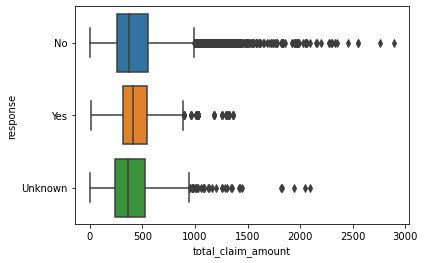

In [44]:
sns.boxplot(x="total_claim_amount", y="response", data=newdf)

<AxesSubplot:xlabel='total_claim_amount', ylabel='Count'>

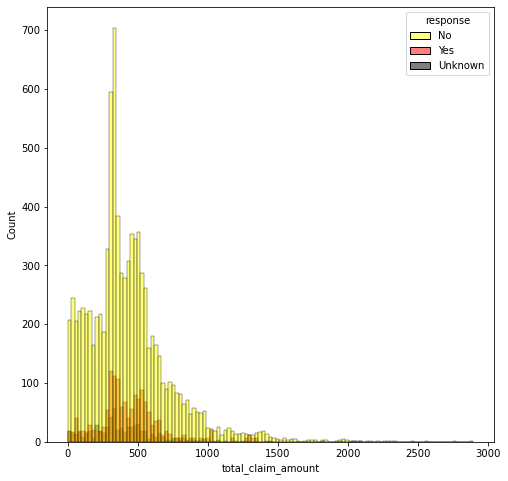

In [45]:
plt.figure(figsize=(8,8))

palette = {"No":"yellow",
           "Yes":"red", 
           "Unknown":"black"}
sns.histplot(data=newdf, x="total_claim_amount",hue='response',palette=palette)

<AxesSubplot:xlabel='income', ylabel='response'>

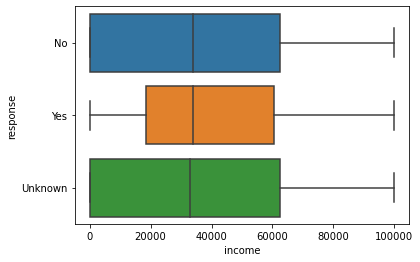

In [46]:
sns.boxplot(x="income", y="response", data=newdf)

<AxesSubplot:xlabel='income', ylabel='Count'>

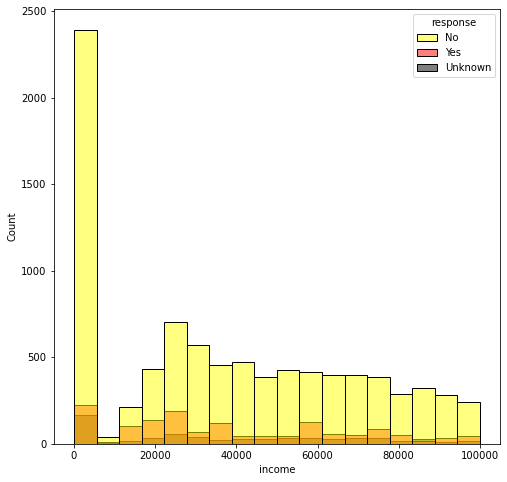

In [47]:
plt.figure(figsize=(8,8))

palette = {"No":"yellow",
           "Yes":"red", 
           "Unknown":"black"}
sns.histplot(data=newdf, x="income",hue='response',palette=palette)

<AxesSubplot:xlabel='total_claim_amount', ylabel='income'>

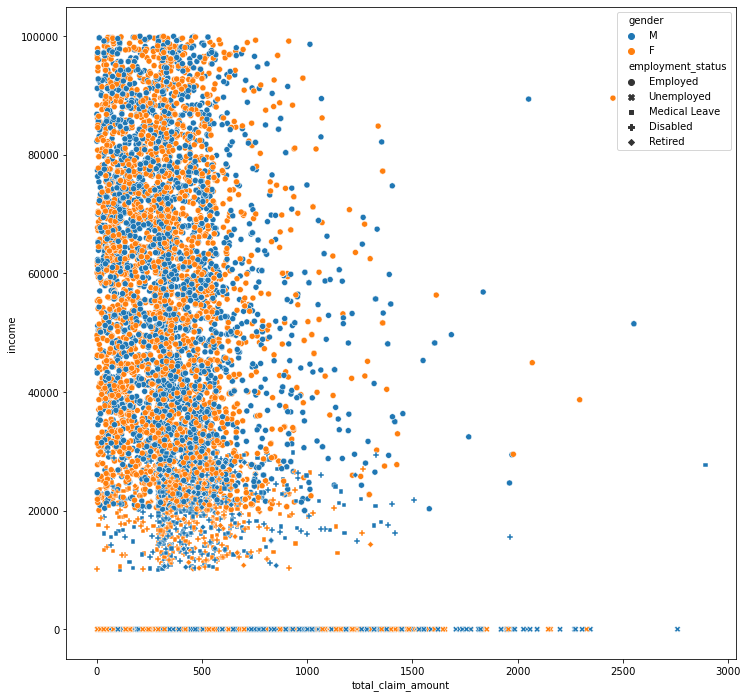

In [48]:
plt.figure(figsize=(12,12))
sns.scatterplot(data=newdf, x="total_claim_amount", y="income",hue='gender',style='employment_status')


<AxesSubplot:xlabel='income', ylabel='total_claim_amount'>

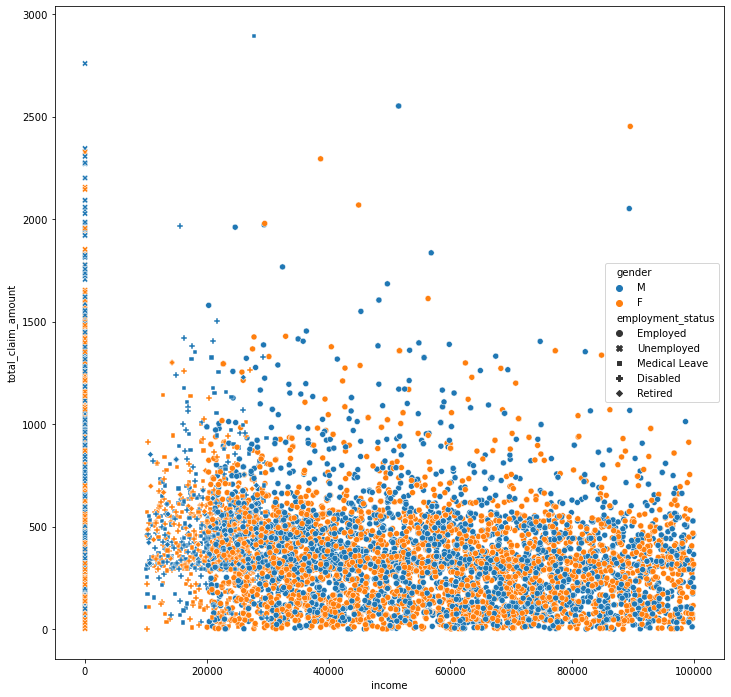

In [49]:
plt.figure(figsize=(12,12))
sns.scatterplot(data=newdf, x="income", y="total_claim_amount",hue='gender',style='employment_status')


In [50]:
newdf.head()

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,Unknown,February
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,Unknown,January
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,February
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,January
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,Unknown,January


In [54]:
#start of lab4



numerical = newdf._get_numeric_data()
numerical.head()

,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,number_of_policies,total_claim_amount
0,0,4809.216960,48029,61,52,9,292.800000
1,1,2228.525238,0,64,26,1,744.924331
2,2,14947.917300,22139,100,31,2,480.000000
3,3,22332.439460,49078,97,3,2,484.013411
4,4,9025.067525,23675,117,31,7,707.925645


In [60]:
#some numerical data is showing up due to more than one data type, discussed with Angela and moving forward like this since it won't affect the required data points
categorical = newdf.select_dtypes(include="object")
categorical.head()

,customer,state,response,coverage,education,employment_status,gender,location_code,marital_status,months_since_last_claim,number_of_open_complaints,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type,month
0,DK49336,Arizona,No,Basic,College,Employed,M,Suburban,Married,7.0,0.0,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,Unknown,February
1,KX64629,California,No,Basic,College,Unemployed,F,Suburban,Single,3.0,0.0,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,Unknown,January
2,LZ68649,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,34.0,0.0,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A,February
3,XL78013,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,10.0,0.0,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A,January
4,QA50777,Oregon,No,Premium,Bachelor,Medical Leave,F,Suburban,Married,Unknown,Unknown,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,Unknown,January


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   customer                   10910 non-null  object
 1   state                      10910 non-null  object
 2   response                   10910 non-null  object
 3   coverage                   10910 non-null  object
 4   education                  10910 non-null  object
 5   employment_status          10910 non-null  object
 6   gender                     10910 non-null  object
 7   location_code              10910 non-null  object
 8   marital_status             10910 non-null  object
 9   months_since_last_claim    10910 non-null  object
 10  number_of_open_complaints  10910 non-null  object
 11  policy_type                10910 non-null  object
 12  policy                     10910 non-null  object
 13  renew_offer_type           10910 non-null  object
 14  sales_

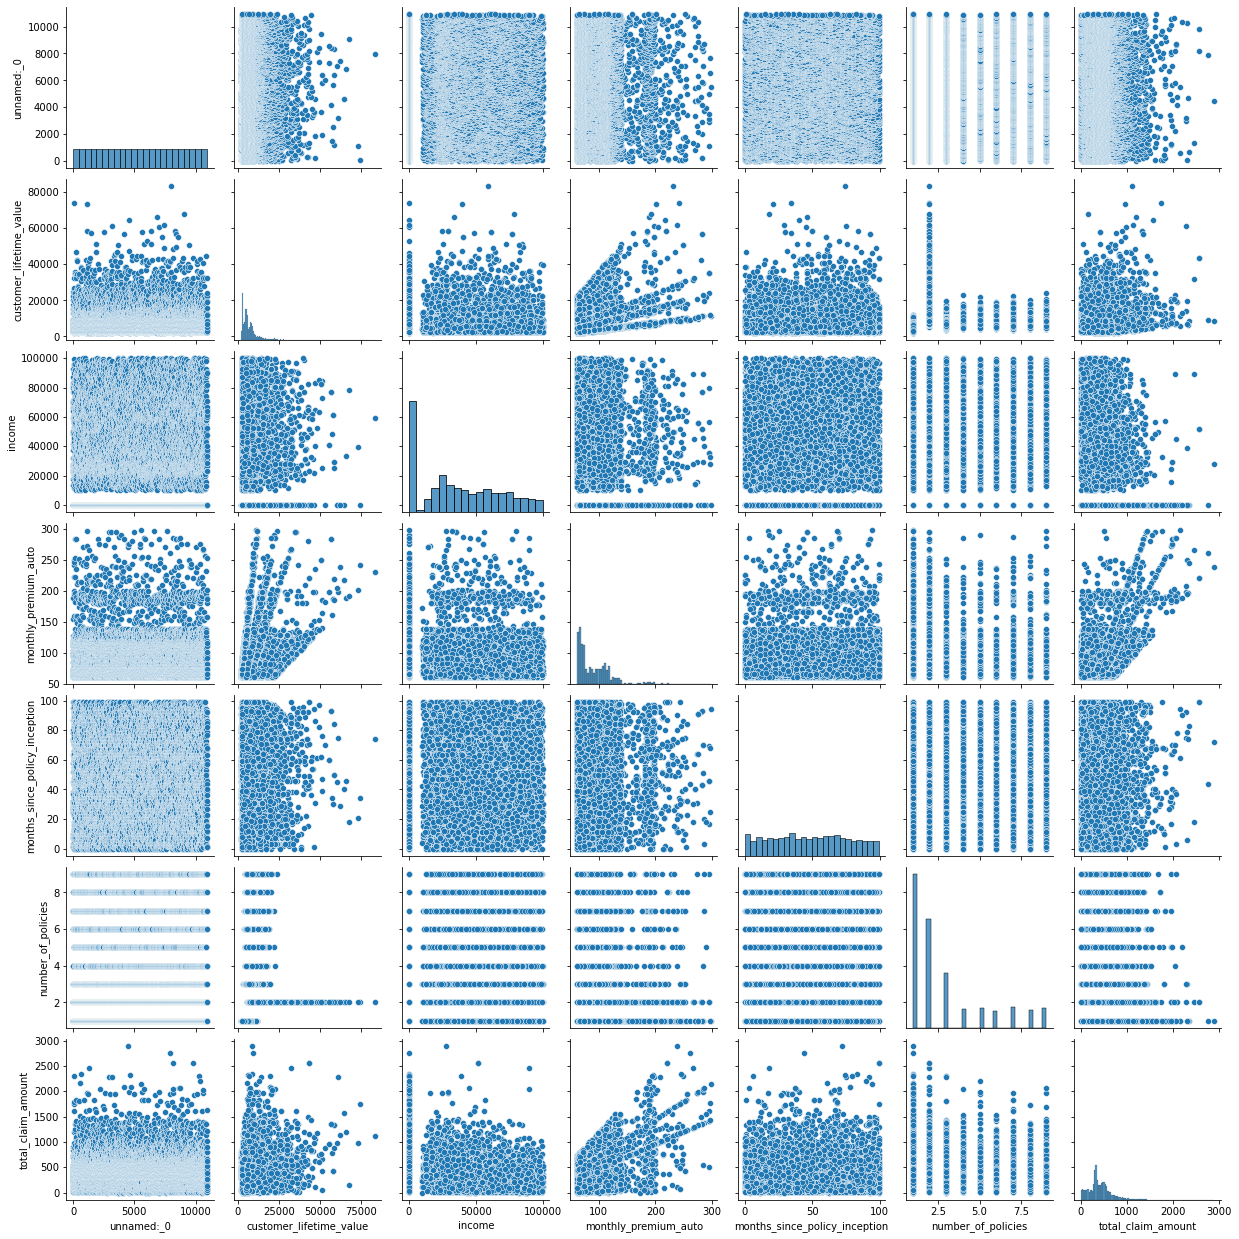

In [62]:
#Use seaborn library to construct distribution plots for the numerical variables

sns.pairplot(data=numerical)


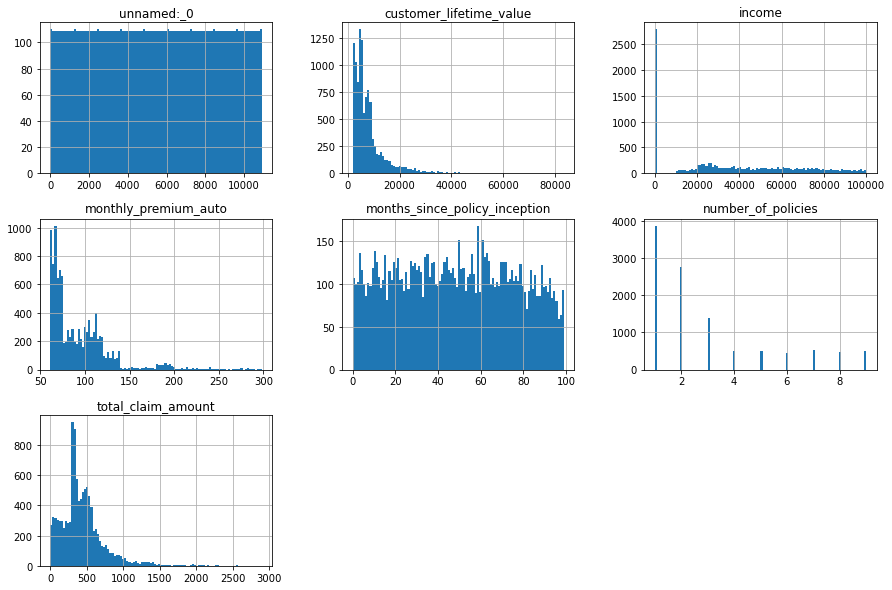

In [76]:
#Use Matplotlib to construct histograms

numerical.hist( bins=100,figsize=(15,10));

In [69]:
#For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.


corr_data = numerical
correlations_matrix = corr_data.corr()
correlations_matrix

,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,number_of_policies,total_claim_amount
unnamed:_0,1.000000,0.001355,0.008910,0.000863,0.012795,0.002319,-0.000593
customer_lifetime_value,0.001355,1.000000,0.028306,0.403069,0.016960,0.016024,0.232626
income,0.008910,0.028306,1.000000,-0.009788,-0.005903,-0.009960,-0.354141
monthly_premium_auto,0.000863,0.403069,-0.009788,1.000000,0.018953,-0.020505,0.631799
months_since_policy_inception,0.012795,0.016960,-0.005903,0.018953,1.000000,-0.009123,0.003095
number_of_policies,0.002319,0.016024,-0.009960,-0.020505,-0.009123,1.000000,-0.008923
total_claim_amount,-0.000593,0.232626,-0.354141,0.631799,0.003095,-0.008923,1.000000


<AxesSubplot:>

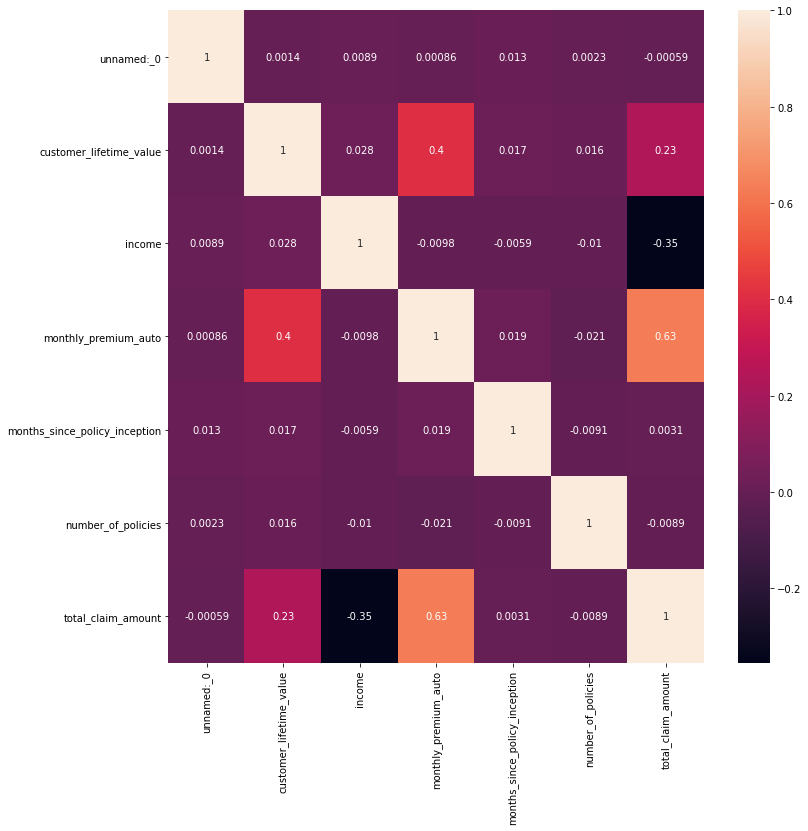

In [71]:
# seaborn heatmap

plt.figure(figsize=(12,12))

sns.heatmap(correlations_matrix,annot=True)